In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import os
import math


In [66]:
#first initialize the list that will contain all sample points for each activity
elevatorUp = []
elevatorDown = []
Ascending = []
Descending = []
Walking = []

In [67]:
#need to remove the last elevator up/down data set
for i in range(1,11):
    db = pd.read_csv(f"test{i}.csv")
    positions = []
    comparison = ""
    for index, value in db.iterrows():
        if value['Activity'] != comparison:
            positions.append(index)
            comparison = value['Activity']
    positions.append(db.shape[0]-1)
    segments = []

    for i in range(len(positions)-1):
        segments.append(db.iloc[positions[i]:positions[i+1]-1])

    for segment in segments:
        if segment['Activity'].iloc[0] == "Elevator Up":
            elevatorUp.append(segment)
        elif segment['Activity'].iloc[0] == "Elevator Down":
            elevatorDown.append(segment)
        elif segment['Activity'].iloc[0] == "Descending Stairs":
            Descending.append(segment)
        elif segment['Activity'].iloc[0] == "Climbing Stairs":
            Ascending.append(segment)
        elif segment['Activity'].iloc[0] == "Walking":
            Walking.append(segment)

In [44]:
print(elevatorUp[9].shape)
print(elevatorDown[0].shape)
print(Ascending[0].shape)
print(Descending[0].shape)
print(Walking[0].shape)

(135, 14)
(2880, 14)
(4746, 14)
(11350, 14)
(8356, 14)


In [64]:
print(len(elevatorUp))
print(len(elevatorDown))
print(len(Ascending))
print(len(Descending))
print(len(Walking))

22
22
8
8
10


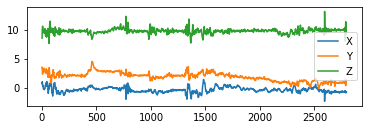

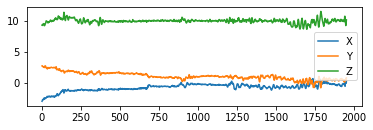

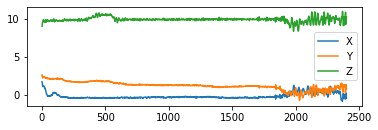

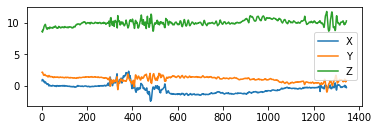

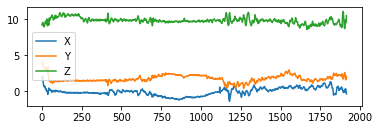

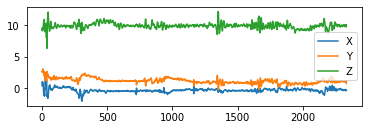

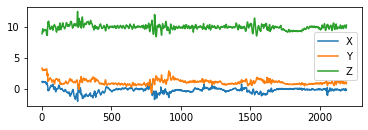

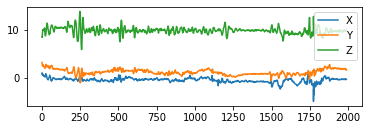

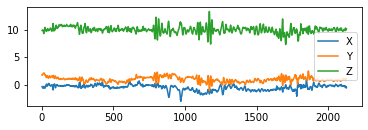

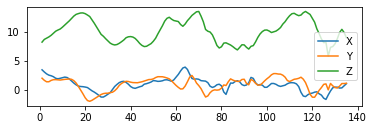

In [348]:
#this section plot the raw data of acceleration values for riding the elevator up
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in elevatorUp:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()
    


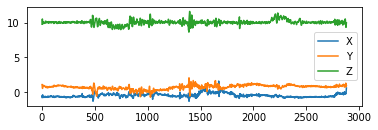

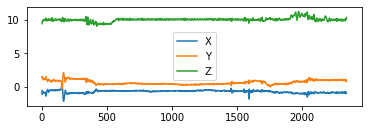

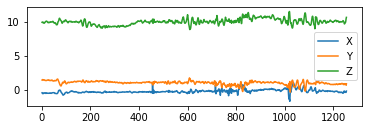

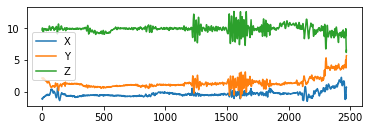

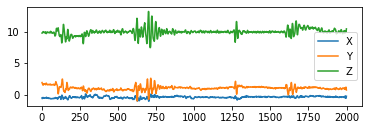

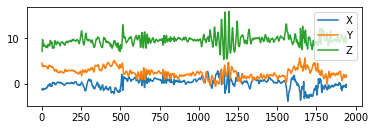

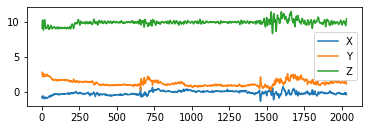

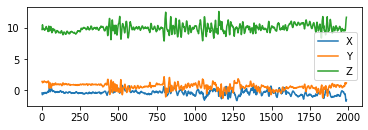

In [350]:
#this section plot the raw data of acceleration values for riding the elevator down
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in elevatorDown:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()

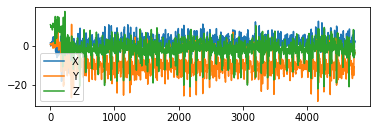

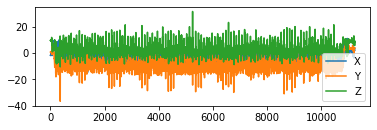

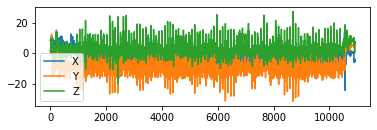

In [351]:
#this section plot the raw data of acceleration values for riding the walking up stair
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Ascending:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()

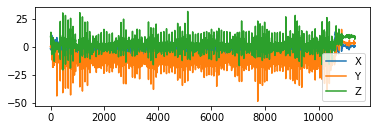

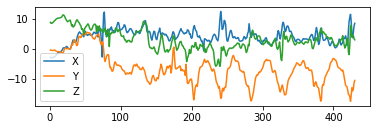

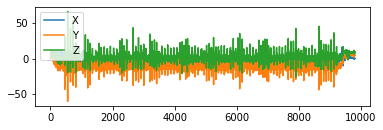

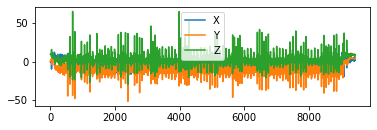

In [352]:
#this section plot the raw data of acceleration values for walking downstair
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Descending:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()

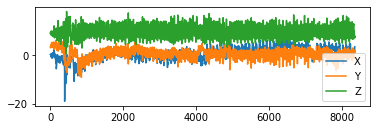

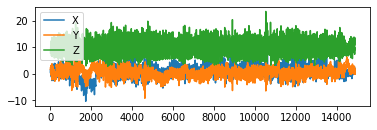

In [353]:
#this section plot the raw data of acceleration values for walking
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Walking:
    x, y, z, i = [], [], [], []
    counter = 0
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        counter += 1
        i.append(counter)
        x.append(value["AccelerometerX"])
        y.append(value["AccelerometerY"])
        z.append(value["AccelerometerZ"])
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(i,x,label='X')
    plt.plot(i,y,label='Y')
    plt.plot(i,z,label='Z')
    plt.legend()

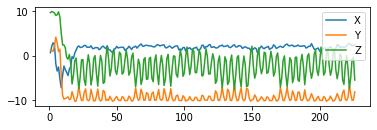

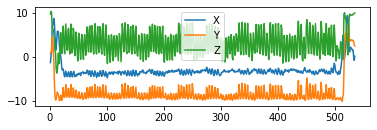

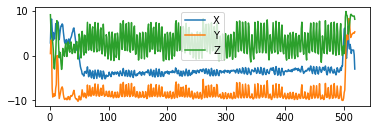

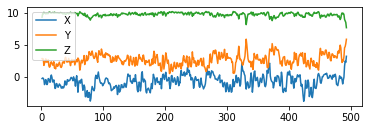

In [60]:
#now we average the data to remove all noise for walking stairs
#we average the data for every 20 data points and see what it looks like
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Ascending:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 20
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        if(counter!=iteration):
            counter += 1
            x+=value["GravityX"]
            y+=value["GravityY"]
            z+=value["GravityZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["GravityX"]
            y+=value["GravityY"]
            z+=value["GravityZ"]
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(averagei,averageX,label='X')
    plt.plot(averagei,averageY,label='Y')
    plt.plot(averagei,averageZ,label='Z')
    plt.legend()

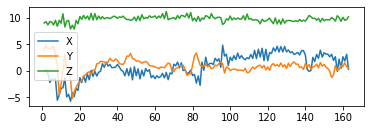

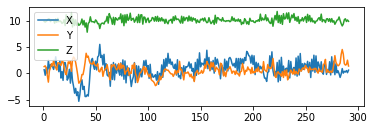

In [90]:
#now we average the data to remove all noise for walking 
#we do an average for every 50 data point and see what it looks like 
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Walking:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 50
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(averagei,averageX,label='X')
    plt.plot(averagei,averageY,label='Y')
    plt.plot(averagei,averageZ,label='Z')
    plt.legend()

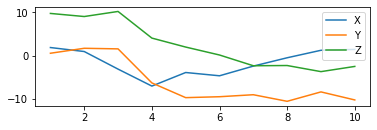

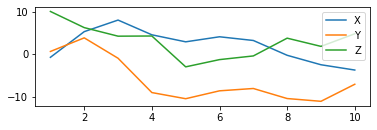

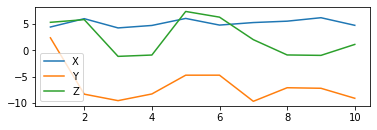

In [59]:
#now we average the data to remove all noise for climbing upstair
#we do an average for every 50 data point and see what it looks like 
import matplotlib.pyplot as plt
import numpy as np
fignum = 1   
plotnum = 211
counter = 0
figureCount = 0
for sample in Ascending:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 50
    if(plotnum == 212):
        fignum+=1
        plotnum = 211
    plt.figure(fignum)
    for index, value in sample.iterrows():
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    plotnum+=1
    plt.subplot(plotnum)
    plt.plot(averagei[0:10],averageX[0:10],label='X')
    plt.plot(averagei[0:10],averageY[0:10],label='Y')
    plt.plot(averagei[0:10],averageZ[0:10],label='Z')
    plt.legend()

In [ ]:
#this is the feature extraction function
def featureExtraction(data):
#data = pd.read_csv(path)
    # print(data.head(5))
    features = []
    X = data.loc[:, 'AverageX']
    Y = data.loc[:, 'AverageY']
    Z = data.loc[:, 'AverageZ']

    plt.plot(range(X.size),X)
    plt.plot(range(X.size),Y)
    plt.plot(range(X.size),Z)

    Xnp = X.to_numpy()
    Ynp = Y.to_numpy()
    Znp = Z.to_numpy()
    # print(X)
    #average (X, Y, Z)
    f1 = X.mean() #Xmean
    f2 = Y.mean() #Ymean
    f3 = Z.mean() #Zmean
    # print(f1,f2,f3)


    #standard deviation (X, Y, Z)
    f4 = X.std() #X_std
    f5 = Y.std() #Y_std
    f6 = Z.std() #Z_std
    # print(f4,f5,f6)


    #average jerk (X, Y, Z)
    dx,dy,dz = [],[],[]
    for i in range(X.size-1):
        dx.append(X[i]-X[i+1])
        dy.append(Y[i]-Y[i+1])
        dz.append(Z[i]-Z[i+1])

    f7 = np.array(dx).mean()
    f8 = np.array(dy).mean()
    f9 = np.array(dz).mean()
    # print(f7,f8,f9)


    #average distance between axes (XY, XZ, YZ) ??
    f10 = (X-Y).mean()
    f11 = (X-Z).mean()
    f12 = (Y-Z).mean()

    # correlation (XY, XZ, YZ), 
    f13 = X.corr(Y)
    f14 = X.corr(Z)
    f15 = Y.corr(Z)

    # number of peaks (X, Y, Z)

    Xpeak = argrelextrema(Xnp, np.greater)[0]
    Ypeak = argrelextrema(Ynp, np.greater)[0]
    Zpeak = argrelextrema(Znp, np.greater)[0]
    f16 = len(Xpeak)
    f17 = len(Ypeak)
    f18 = len(Zpeak)

    # print(f16,f17,f18)


    # number of valleys (X, Y, Z), 
    Xvalley = argrelextrema(Xnp, np.less)[0]
    Yvalley = argrelextrema(Ynp, np.less)[0]
    Zvalley = argrelextrema(Znp, np.less)[0]
    f19 = len(Xvalley)
    f20 = len(Yvalley)
    f21 = len(Zvalley)
    # print(f19,f20,f21)

    # print(Xpeak,Xvalley)

    tmpx,tmpy,tmpz = 0,0,0
    for i in X:
        tmpx += i**2
    for i in Y:
        tmpy += i**2
    for i in Z:
        tmpz += i**2

    f22 = math.sqrt(tmpx/X.size)
    f23 = math.sqrt(tmpy/Y.size)
    f24 = math.sqrt(tmpz/Z.size)

    # # energy (X, Y, Z)
    # f25 = X.min()
    # f26 = Y.min()
    # f27 = Z.min()

    # entropy (X, Y, Z)
    # f28 = X.min()
    # f29 = Y.min()
    # f30 = Z.min()

    # average side height (X, Y, Z)
    Xcnt,Ycnt,Zcnt = 0,0,0
    Xsh,Ysh,Zsh = [],[],[]
    for i in range(len(Xpeak)-1):
        Xsh.append(Xpeak[i]-Xpeak[i+1])
        Xcnt += Xpeak[i]-Xpeak[i+1]
    for i in range(len(Ypeak)-1):
        Ysh.append(Ypeak[i]-Ypeak[i+1])
        Ycnt += Ypeak[i]-Ypeak[i+1]
    for i in range(len(Zpeak)-1):
        Zsh.append(Zpeak[i]-Zpeak[i+1])
        Zcnt += Zpeak[i]-Zpeak[i+1]

    f31 = Xcnt/len(Xpeak)
    f32 = Ycnt/len(Ypeak)
    f33 = Zcnt/len(Zpeak)

    # print(f31,f32,f33)

    # standard deviation side height (X, Y, Z)
    f34 = np.array(Xsh).std()
    f35 = np.array(Ysh).std()
    f36 = np.array(Zsh).std()
    # print(f34)

    Xpv = [X[i] for i in Xpeak]
    Ypv = [Y[i] for i in Ypeak]
    Zpv = [Z[i] for i in Zpeak]
    # average peak value (X, Y, Z)
    f37 = np.array(Xpv).mean()
    f38 = np.array(Ypv).mean()
    f39 = np.array(Zpv).mean()
    # print(f37,f38,f39)

    # standard deviation peak value(X, Y, Z)

    f40 = np.array(Xpv).std()
    f41 = np.array(Ypv).std()
    f42 = np.array(Zpv).std()
    # print(f40,f41)

    # average valley value (X, Y, Z)
    Xpv1 = [X[i] for i in Xvalley]
    Ypv1 = [Y[i] for i in Yvalley]
    Zpv1 = [Z[i] for i in Zvalley]
    f43 = np.array(Xpv1).mean()
    f44 = np.array(Ypv1).mean()
    f45 = np.array(Zpv1).mean()

    # standard deviation valley value(X, Y, Z)
    f46 = np.array(Xpv1).std()
    f47 = np.array(Ypv1).std()
    f48 = np.array(Zpv1).std()

    # axis crossing (XY, XZ, YZ)
    #XY
    XYcc,YZcc,XZcc = 0,0,0
    for i in range(X.size-1):
        if (X[i]-Y[i])*(X[i+1]-Y[i+1])<0:
            XYcc += 1
        if (Z[i]-Y[i])*(Z[i+1]-Y[i+1])<0:
            YZcc += 1
        if (Z[i]-X[i])*(Z[i+1]-X[i+1])<0:
            XZcc += 1
    # print(XYcc,YZcc,XZcc)
    # # print(f4)

    f49 = XYcc
    f50 = YZcc
    f51 = XZcc
    # print(f49,f50,f51)
    features.append(f1)
    features.append(f2)
    features.append(f3)
    features.append(f4)
    features.append(f5)
    features.append(f6)
    features.append(f7)
    features.append(f8)
    features.append(f9)
    features.append(f10)
    features.append(f11)
    features.append(f12)
    features.append(f13)
    features.append(f14)
    features.append(f15)
    features.append(f16)
    features.append(f17)
    features.append(f18)
    features.append(f19)
    features.append(f20)
    features.append(f21)
    features.append(f22)
    features.append(f23)
    features.append(f24)
   
    features.append(f31)
    features.append(f32)
    features.append(f33)
    features.append(f34)
    features.append(f35)
    features.append(f36)
    features.append(f37)
    features.append(f38)
    features.append(f39)
    features.append(f40)
    features.append(f41)
    features.append(f42)
    features.append(f43)
    features.append(f44)
    features.append(f45)
    features.append(f46)
    features.append(f47)
    features.append(f48)
    features.append(f49)
    features.append(f50)
    features.append(f51)
    return features
    
    

In [47]:
#this list stores all the processed data and will be eventually converted into a csv file
features = []

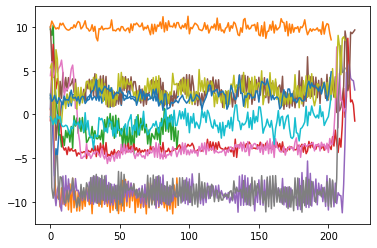

In [50]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons
#starting with the climbing upstair. 
import matplotlib.pyplot as plt
import numpy as np

for sample in Ascending:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 50
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

C:\Users\matth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\matth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\matth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


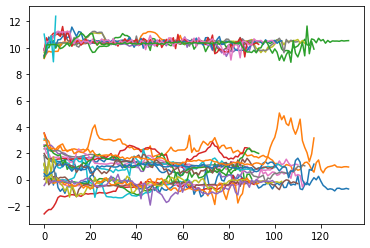

In [51]:
#processed data from elevator up
import matplotlib.pyplot as plt
import numpy as np

for sample in elevatorUp:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 20
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

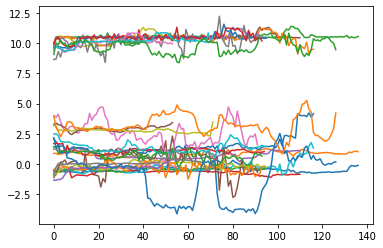

In [52]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons
#now elevator down
import matplotlib.pyplot as plt
import numpy as np

for sample in elevatorDown:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 20
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

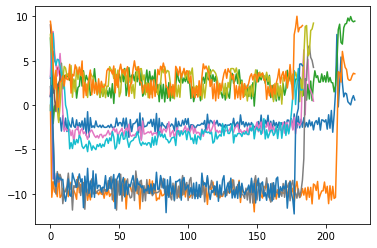

In [53]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons
#now walking down stair
import matplotlib.pyplot as plt
import numpy as np

for sample in Descending:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 50
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

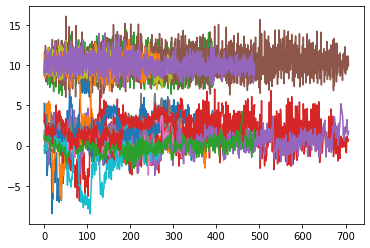

In [54]:
#now is the real deal. Start processing all data and feed them into feature extraction funcitons
#walking on the plain floor
import matplotlib.pyplot as plt
import numpy as np

for sample in Walking:
    x, y, z, i = 0,0,0,0
    averageX, averageY, averageZ, averagei = [], [],[],[]
    counter = 0
    counter2 = 0
    iteration = 20
    activity = ""
    for index, value in sample.iterrows():
        activity = value["Activity"]
        if(counter!=iteration):
            counter += 1
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
        else:
            counter = 0
            counter2+=1
            averagei.append(counter2)
            averageX.append(x/iteration)
            averageY.append(y/iteration)
            averageZ.append(z/iteration)
            x = 0
            y = 0
            z = 0
            x+=value["AccelerometerX"]
            y+=value["AccelerometerY"]
            z+=value["AccelerometerZ"]
    db = pd.DataFrame({'AverageX':averageX,
                       'AverageY':averageY,
                       'AverageZ':averageZ
                           })
    sampleFeatures = featureExtraction(db)
    sampleFeatures.append(activity)
    features.append(sampleFeatures)
    

In [55]:
#now create a dataframe and the header for the csv file
header = []
for i in range(1,25):
    header.append(f'f{i}')
for i in range(31,52):
    header.append(f'f{i}')
header.append('label')


In [56]:
df = pd.DataFrame(features,columns=header)

In [57]:
df.to_csv(r'sampleFeatures.csv',header=True,index=False)